In [173]:
%matplotlib inline

In [174]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std

np.random.seed(9876789)

# OLS estimation
Artificial data:

In [187]:
nsample = 10
x = np.linspace(0, 5, nsample)
X = np.column_stack((x, x**2))
beta = np.array([1, 0.1, 10])
e = np.random.normal(size=nsample)

array([-0.84051589,  1.59749526,  0.46554204, -0.50815894,  2.9343057 ,
        0.41289442, -0.94327249, -0.57123425,  0.32858663, -0.0366525 ])

Our model needs an intercept so we add a column of 1s:

In [188]:
X = sm.add_constant(X)
y_true = np.dot(X, beta)
y = y_true + 2*e
X

array([[ 1.        ,  0.        ,  0.        ],
       [ 1.        ,  0.55555556,  0.30864198],
       [ 1.        ,  1.11111111,  1.2345679 ],
       [ 1.        ,  1.66666667,  2.77777778],
       [ 1.        ,  2.22222222,  4.9382716 ],
       [ 1.        ,  2.77777778,  7.71604938],
       [ 1.        ,  3.33333333, 11.11111111],
       [ 1.        ,  3.88888889, 15.12345679],
       [ 1.        ,  4.44444444, 19.75308642],
       [ 1.        ,  5.        , 25.        ]])

Fit and summary:

In [189]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.573e+04
Date:                Thu, 09 Apr 2020   Prob (F-statistic):           1.64e-13
Time:                        12:12:53   Log-Likelihood:                -16.251
No. Observations:                  10   AIC:                             38.50
Df Residuals:                       7   BIC:                             39.41
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7045      1.155      0.610      0.561      -2.026       3.435
x

Quantities of interest can be extracted directly from the fitted model. Type dir(results) for a full list. Here are some examples:

In [190]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  [0.7044978  1.09425936 9.7385214 ]
R2:  0.9997775696738458


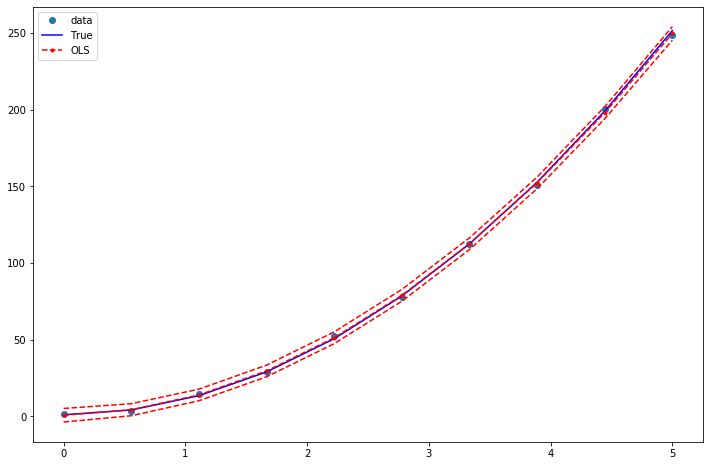

In [191]:
prstd, iv_l, iv_u = wls_prediction_std(results)

fig, ax = plt.subplots(figsize=(12,8))

ax.plot(x, y, 'o', label="data")
ax.plot(x, y_true, 'b-', label="True")
ax.plot(x, results.fittedvalues, 'r--.', label="OLS")
ax.plot(x, iv_u, 'r--')
ax.plot(x, iv_l, 'r--')

ax.legend(loc='best');

# OLS non-linear curve but linear in parameters
We simulate artificial data with a non-linear relationship between x and y:

In [180]:
# количестоо точек
nsample = 100
sig = 0.5
x = np.linspace(0, 20, nsample) # количество точек по оси x
X = np.column_stack((x, np.sin(x), (x-5)**2, np.ones(nsample))) # возвращает объединение нескольких 1D массивов в 2D массив.
beta = [0.5, 0.5, 0.01, 10] # инициализация дополнительный вектор для моделирования исходной величины

y_true = np.dot(X, beta) # скалаярное приозведение 2 массивово - 2D массивы
y = y_true + sig * np.random.normal(size=nsample) # к моделированное величеине добавляется случайный вклад

In [181]:
# X

Fit and summary:

In [182]:
res = sm.OLS(y, X).fit()
print(res.summary())

OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     1529.
Date:                Thu, 09 Apr 2020   Prob (F-statistic):           7.14e-81
Time:                        12:12:28   Log-Likelihood:                -73.620
No. Observations:                 100   AIC:                             155.2
Df Residuals:                      96   BIC:                             165.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4830      0.020     24.762      0.000       0.444       0.522
x

Extract other quantities of interest:

In [183]:
print('Parameters: ', res.params)
print('Standard errors: ', res.bse)
print('Predicted values: ', res.predict())

Parameters:  [ 0.48298514  0.53780196  0.01179093 10.05853232]
Standard errors:  [0.01950543 0.07537692 0.00171398 0.12647314]
Predicted values:  [10.35330559 10.53544885 10.71416547 10.88524493 11.04482646 11.18955611
 11.31672314 11.42437031 11.51137344 11.5774872  11.62335501 11.65048293
 11.66117839 11.65845632 11.64591652 11.62759729 11.60781113 11.59096934
 11.58140262 11.58318491 11.5999677  11.63483147 11.69016046 11.76754566
 11.86772008 11.99052897 12.13493611 12.29906593 12.48027983 12.67528347
 12.88026079 13.0910292  13.30320972 13.51240508 13.71437856 13.90522634
 14.08153626 14.24052662 14.38015929 14.49922265 14.59738086 14.67518749
 14.73406304 14.77623715 14.8046579  14.82287193 14.83488016 14.84497507
 14.8575661  14.87700031 14.90738558 14.95242351 15.01525887 15.09835169
 15.2033772  15.33115769 15.48162909 15.65384354 15.84600796 16.05555698
 16.27925728 16.51333911 16.7536496  16.9958217  17.23545176 17.4682787
 17.69035728 17.89821857 18.08901106 18.26061665 18.

Draw a plot to compare the true relationship to OLS predictions. Confidence intervals around the predictions are built using the wls_prediction_std command.

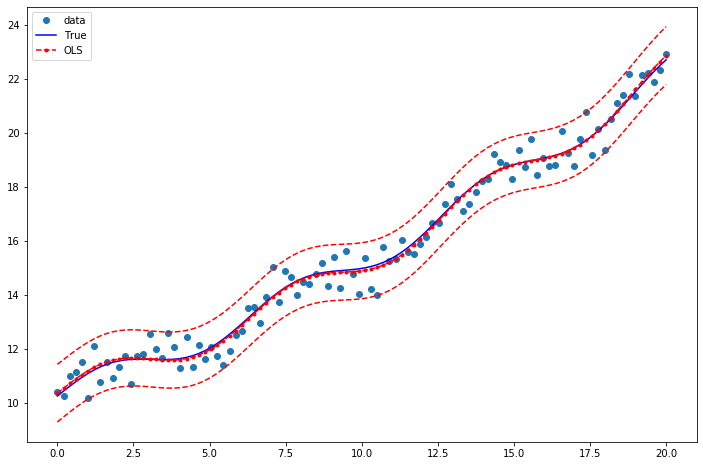

In [184]:
prstd, iv_l, iv_u = wls_prediction_std(res)

fig, ax = plt.subplots(figsize=(12,8))

ax.plot(x, y, 'o', label="data")
ax.plot(x, y_true, 'b-', label="True")
ax.plot(x, res.fittedvalues, 'r--.', label="OLS")
ax.plot(x, iv_u, 'r--')
ax.plot(x, iv_l, 'r--')

ax.legend(loc='best');

In [185]:
res.cov_params()

array([[ 3.80461708e-04,  2.89848418e-04, -2.97128326e-05,
        -2.06114659e-03],
       [ 2.89848418e-04,  5.68168055e-03, -1.88995763e-05,
        -1.97512355e-03],
       [-2.97128326e-05, -1.88995763e-05,  2.93773557e-06,
         1.24420288e-04],
       [-2.06114659e-03, -1.97512355e-03,  1.24420288e-04,
         1.59954541e-02]])

In [186]:
np.linspace(0, 20, 10)

array([ 0.        ,  2.22222222,  4.44444444,  6.66666667,  8.88888889,
       11.11111111, 13.33333333, 15.55555556, 17.77777778, 20.        ])